<a href="https://colab.research.google.com/github/Dyakonov/Colab/blob/main/dj_traintestsplit_invest01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование разбиения выборки на части

In [ ]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np






# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
# plt.style.use('bmh')
#plt.style.use('seaborn-white')
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-dark')




figsize(7, 3)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов

import matplotlib.pyplot as plt

import matplotlib as mpl
# mpl.rcParams['font.family'] = 'Ubuntu'

# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')
# plt.rc('font', weight='bold')
# plt.rc('xtick', labelsize=12)
# plt.rc('ytick', labelsize=12)

# # чтобы был русский шрифт
# from matplotlib import rc

# font = {'family': 'Droid Sans',
#         'weight': 'normal'}
# rc('font', **font)
import pylab as P


plt.rc('font', size=14)



Populating the interactive namespace from numpy and matplotlib


<ipython-input-1-e695a5ac4382>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [ ]:
from tqdm import tqdm

## модельный эксперимент со случайными величинами



In [ ]:
def myestimation(x):
  """
  построить "модель". В простейшем случае вычислить среднее
  """
  return np.mean(x)

def make_samples(n):
  """
  сделать выборку, какую-то !
  """
  return np.random.rand(n) ** 2

def run_experiment(n_all = 100, n_splits = 1000):
  # объём всех данных
  # сколько раз разбивать
  means = []
  stds = []
  lens = []
  sizes = np.linspace(0.05, 0.95, 19) # как разбивать

  for s in tqdm(sizes):
    train_size = int(n_all * s)
    test_size = n_all - train_size
    cv = np.zeros(n_splits)

    for i in range(n_splits):
      train = make_samples(train_size)
      test = make_samples(test_size)

      a = myestimation(train)
      y = myestimation(test)

      cv[i] = np.abs(a - y)

    lens.append(len(cv))
    means.append(np.mean(cv))
    stds.append(np.std(cv))
  return (sizes, lens, means, stds)

In [ ]:
sizes, lens, means, stds = run_experiment(n_all = 100, n_splits = 1000)
sizes2, lens2, means2, stds2 = run_experiment(n_all = 1000, n_splits = 1000)
sizes3, lens3, means3, stds3 = run_experiment(n_all = 100, n_splits = 1000)

100%|██████████| 19/19 [00:00<00:00, 45.73it/s]


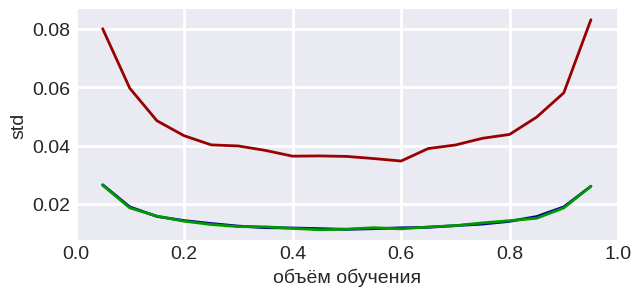

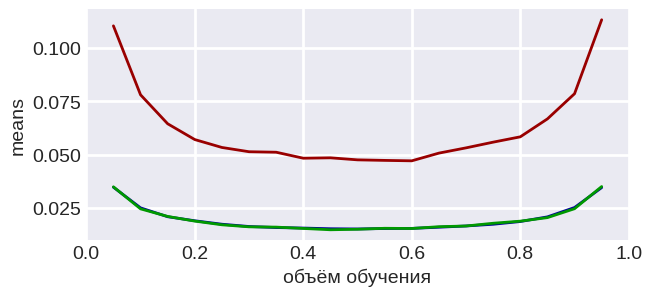

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(sizes, stds, c='#000099', lw=2)
plt.plot(sizes, stds2, c='#009900', lw=2)
plt.plot(sizes, stds3, c='#990000', lw=2)
plt.ylabel('std')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(sizes, means, c='#000099', lw=2)
plt.plot(sizes, means2, c='#009900', lw=2)
plt.plot(sizes, means3, c='#990000', lw=2)
plt.ylabel('means')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)

### остаёмся в рамках одной выборки
просто её перемешиваем

In [ ]:
def run_experiment_xshuffle(n_all = 100, n_splits = 1000):
  # объём всех данных
  # сколько раз разбивать
  means = []
  stds = []
  lens = []
  sizes = np.linspace(0.05, 0.95, 19) # как разбивать

  for s in tqdm(sizes):
    x = make_samples(n_all)
    train_size = int(n_all * s)
    test_size = n_all - train_size
    cv = np.zeros(n_splits)

    for i in range(n_splits):
      x = np.random.permutation(x) # перемешать
      train = x[:train_size] # разбить
      test = x[-test_size:]

      a = myestimation(train)
      y = myestimation(test)

      cv[i] = np.abs(a - y)

    lens.append(len(cv))
    means.append(np.mean(cv))
    stds.append(np.std(cv))
  return (sizes, lens, means, stds)

In [ ]:
sizes, lens, means, stds = run_experiment(n_all = 1000, n_splits = 10000)
sizes2, lens2, means2, stds2 = run_experiment_xshuffle(n_all = 1000, n_splits = 10000)

100%|██████████| 19/19 [00:13<00:00,  1.41it/s]


ValueError: ignored

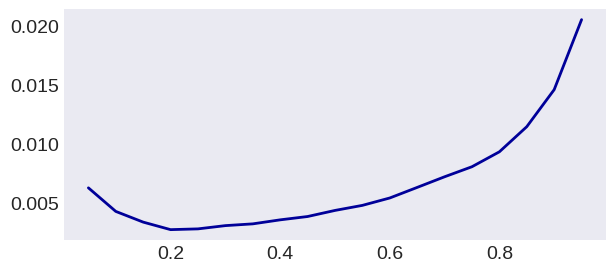

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(sizes, stds, c='#000099', lw=2)
plt.plot(sizes, stds2, c='#009900', lw=2)
#plt.plot(sizes, stds3, c='#990000', lw=2)
plt.ylabel('std')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(sizes, means, c='#000099', lw=2)
plt.plot(sizes, means2, c='#009900', lw=2)
#plt.plot(sizes, means3, c='#990000', lw=2)
plt.ylabel('means')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)

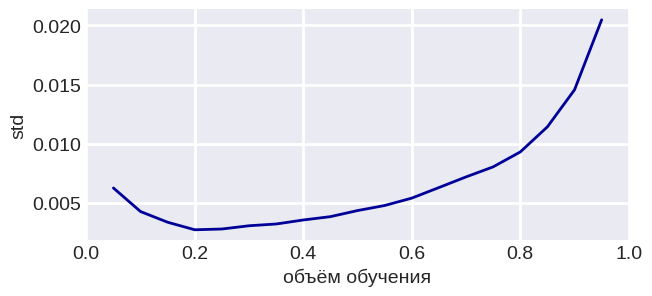

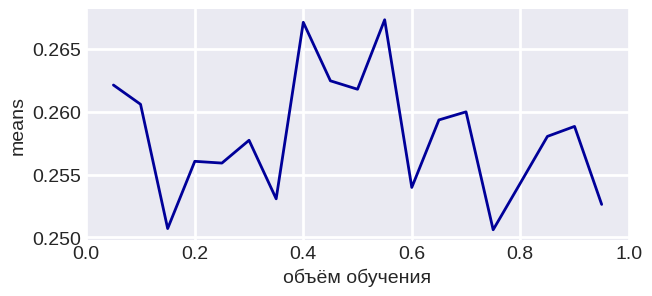

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(sizes, stds, c='#000099', lw=2)
plt.plot(sizes, stds2, c='#009900', lw=2)
#plt.plot(sizes, stds3, c='#990000', lw=2)
plt.ylabel('std')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(sizes, means, c='#000099', lw=2)
plt.plot(sizes, means2, c='#009900', lw=2)
#plt.plot(sizes, means3, c='#990000', lw=2)
plt.ylabel('means')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)

## теперь меняем оценку качества

In [ ]:
def myloss(y, a):
  return (np.mean(np.abs(y - a)), np.mean((y - a)**2))

def run_experiment_loss(n_all = 100, n_splits = 1000):
  # объём всех данных
  # сколько раз разбивать
  means = []
  stds = []
  means2 = []
  stds2 = []
  lens = []
  sizes = np.linspace(0.05, 0.95, 19) # как разбивать

  for s in tqdm(sizes):
    x = make_samples(n_all)
    train_size = int(n_all * s)
    test_size = n_all - train_size
    cv = np.zeros(n_splits)
    cv2 = np.zeros(n_splits)

    for i in range(n_splits):
      x = np.random.permutation(x) # перемешать
      train = x[:train_size] # разбить
      test = x[-test_size:]

      a = myestimation(train)
      y = test # myestimation(test)

      cv[i], cv2[i] = myloss(y, a)

    lens.append(len(cv))
    means.append(np.mean(cv))
    means2.append(np.mean(cv2))
    stds.append(np.std(cv))
    stds2.append(np.std(cv2))
  return (sizes, lens, means, stds, means2, stds2)

In [ ]:
sizes, lens, means, stds, means2, stds2 = run_experiment_loss(n_all = 1000, n_splits = 10000)

100%|██████████| 19/19 [00:11<00:00,  1.72it/s]


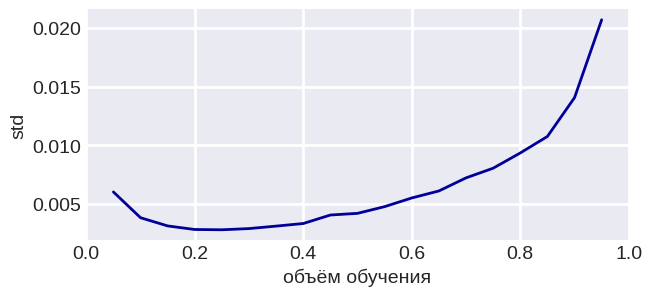

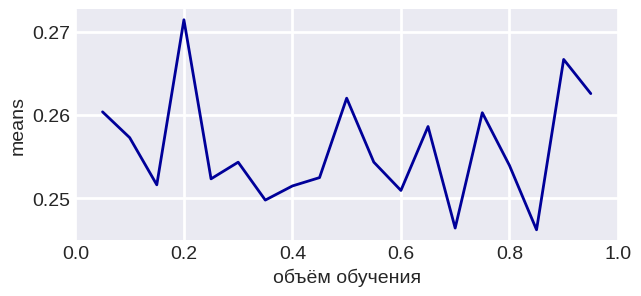

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(sizes, stds, c='#000099', lw=2)
#plt.plot(sizes, stds2, c='#009900', lw=2)
#plt.plot(sizes, stds3, c='#990000', lw=2)
plt.ylabel('std')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(sizes, means, c='#000099', lw=2)
#plt.plot(sizes, means2, c='#009900', lw=2)
#plt.plot(sizes, means3, c='#990000', lw=2)
plt.ylabel('means')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)

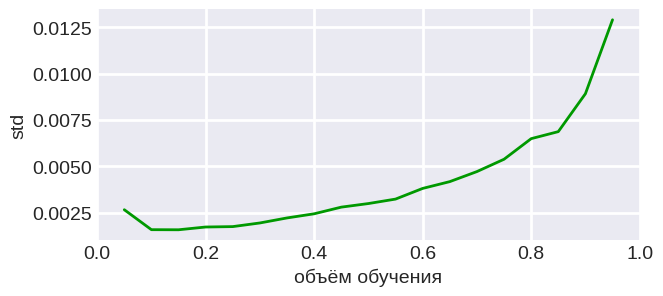

In [ ]:
plt.figure(figsize=(7, 3))
#plt.plot(sizes, stds, c='#000099', lw=2)
plt.plot(sizes, stds2, c='#009900', lw=2)
#plt.plot(sizes, stds3, c='#990000', lw=2)
plt.ylabel('std')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)
plt.show()

NameError: ignored

# Эксперименты с моделями ML

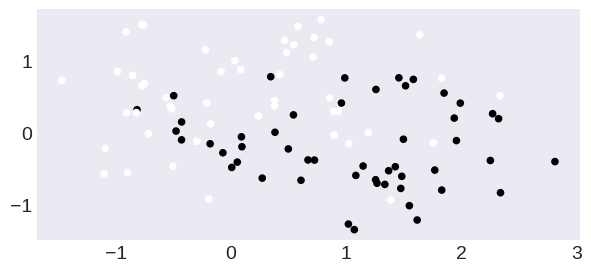

In [ ]:
name_experiment = "moon_noise0.5"
from sklearn.datasets import make_moons
m = 100
q = 100000
X, y = make_moons(n_samples=m, shuffle=True, noise=0.5, random_state=11)
X2, y2 = make_moons(n_samples=q, shuffle=True, noise=0.5, random_state=120)
# или 1000
plt.scatter(X[:,0], X[:,1], 20, y) #np.arange(len(y)))

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

model = LogisticRegression()

model.fit(X, y)
a = model.predict_proba(X2)[:,1]
qtest = roc_auc_score(y2, a)
qtest

0.8876320684000001

In [ ]:
def runexp(X, y, model, sizes, n_splits=1000, scoring='roc_auc', stratified=True):
  means = np.zeros(len(sizes))
  stds = np.zeros(len(sizes))
  lens = np.zeros(len(sizes))
  # sizes = np.linspace(0.05, 0.95, 19)
  for j, s in tqdm(enumerate(sizes)):
    if stratified:
      rs = StratifiedShuffleSplit(n_splits=n_splits, train_size=s, random_state=j) #
    else:
      rs = ShuffleSplit(n_splits=n_splits, train_size=s, random_state=j) #


    cv =  cross_val_score(model, X, y, cv=rs, scoring=scoring)
    lens[j] = len(cv)
    means[j] = np.mean(cv)
    stds[j] = np.std(cv)

  return lens, means, stds

In [ ]:
lens, means, stds = runexp(X, y, model)

19it [01:16,  4.00s/it]


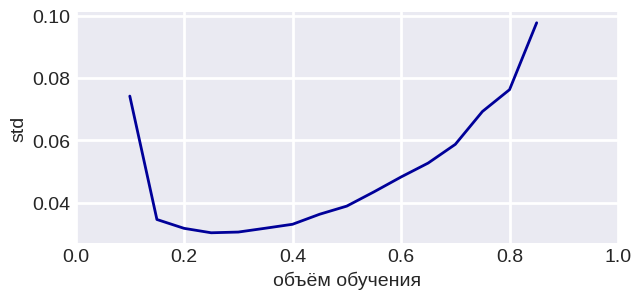

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(sizes, stds, c='#000099', lw=2)
plt.ylabel('std')
plt.xlabel('объём обучения')
# plt.xticks(range(2, 20), range(2, 20));
plt.xlim([0.0, 1.0])
plt.grid(lw=2)

In [ ]:

def draw_pic(name, qtest, sizes, means, stds):
  plt.figure(figsize=(7, 3))
  plt.plot([0, 1], [qtest, qtest], '--', c='k', lw=2, label='Big Test')
  plt.plot(sizes, means, c='#000099', lw=2, label = 'ShuffleSplit')
  plt.fill_between(sizes, means - stds, means + stds, color='#AAAAFF',alpha=0.35, label='std')
  plt.ylabel('ROC AUC')
  plt.xlabel('объём обучения')
  # plt.xticks(range(2, 20), range(2, 20));
  plt.xlim([0.0, 1.0])
  # plt.ylim([0.75, 0.95])
  plt.grid(lw=2)
  plt.title(name)
  plt.legend(loc=(1,0))

draw_pic('LogReg', qtest, sizes, means, stds)

NameError: ignored

# Эксперименты с разными моделями

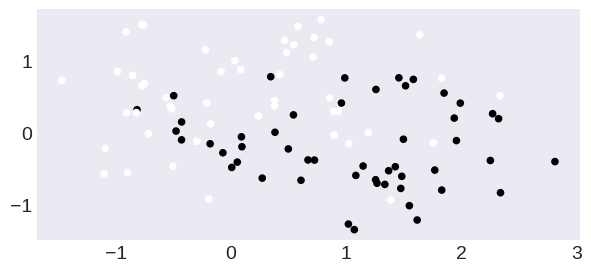

In [ ]:
name_experiment = "moon_noise0.5"

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.datasets import make_moons
m = 100
q = 100000
X, y = make_moons(n_samples=m, shuffle=True, noise=0.5, random_state=11)
X2, y2 = make_moons(n_samples=q, shuffle=True, noise=0.5, random_state=120)
# или 1000
plt.scatter(X[:,0], X[:,1], 20, y)

In [ ]:
from sklearn.utils import all_estimators

classifiers = all_estimators(type_filter='classifier')

for name, ClassifierClass in classifiers:
    print(name)


AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LinearSVC
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NearestCentroid
NuSVC
OneVsOneClassifier
OneVsRestClassifier
OutputCodeClassifier
PassiveAggressiveClassifier
Perceptron
QuadraticDiscriminantAnalysis
RadiusNeighborsClassifier
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC
StackingClassifier
VotingClassifier


Model LogisticRegression


19it [00:08,  2.16it/s]


qtest 0.888, means 0.841, stds 0.0649, lens 1e+02
Model DecisionTreeClassifier


19it [00:05,  3.67it/s]


qtest 0.724, means 0.707, stds 0.0822, lens 1e+02
Model GaussianNB


19it [00:05,  3.52it/s]


qtest 0.887, means 0.831, stds 0.0674, lens 1e+02
Model SVC


19it [00:06,  2.80it/s]


qtest 0.883, means 0.819, stds 0.0734, lens 1e+02
Model KNeighborsClassifier


19it [00:06,  2.91it/s]


qtest 0.841, means 0.797, stds 0.0637, lens 1e+02
Model ExtraTreesClassifier


19it [03:56, 12.47s/it]


qtest 0.829, means 0.821, stds 0.0707, lens 1e+02
Model RandomForestClassifier


19it [05:06, 16.15s/it]


qtest 0.848, means 0.811, stds 0.0703, lens 1e+02
Model GradientBoostingClassifier


19it [02:17,  7.24s/it]


qtest 0.852, means 0.79, stds 0.0784, lens 1e+02


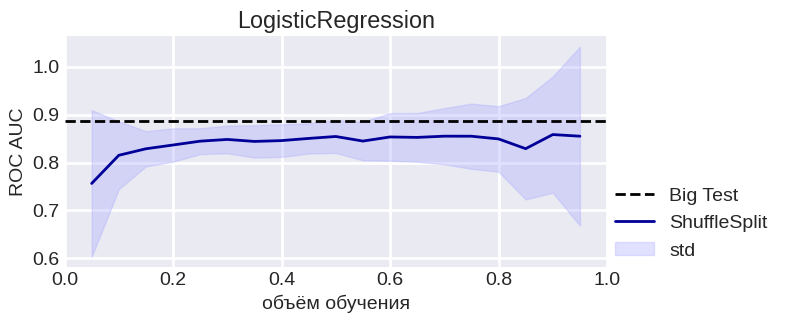

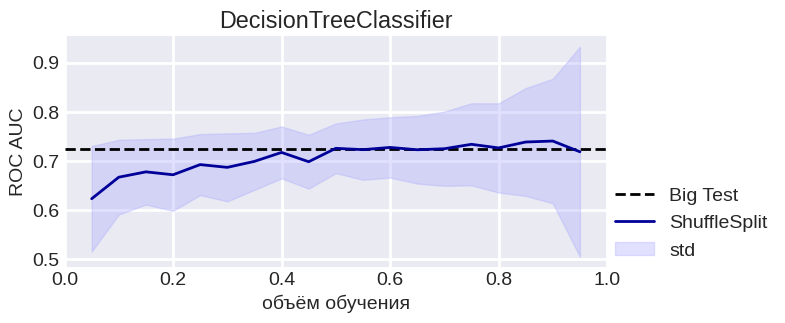

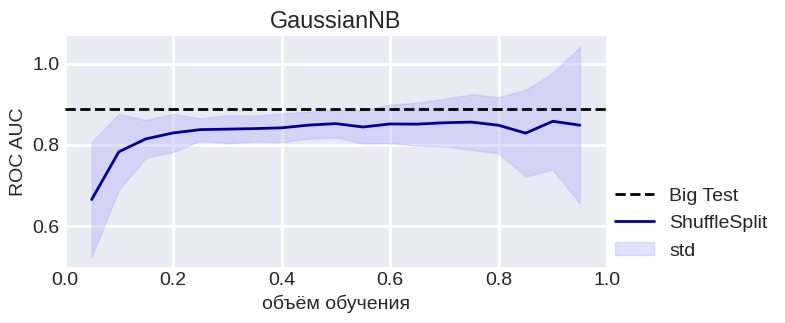

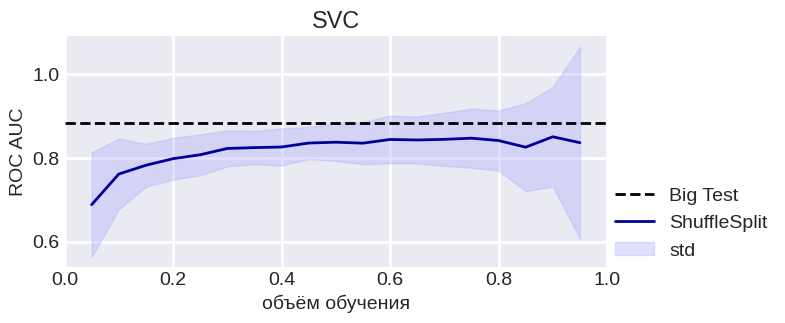

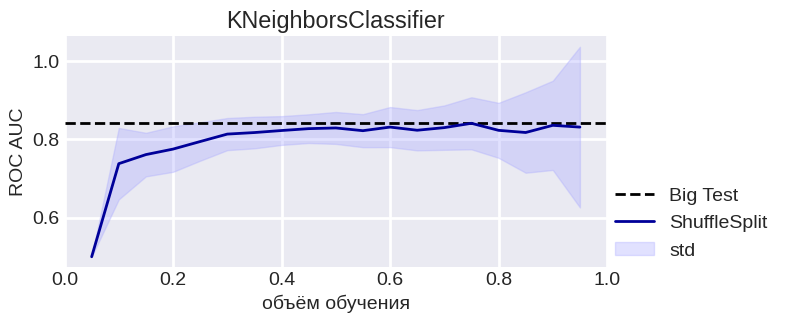

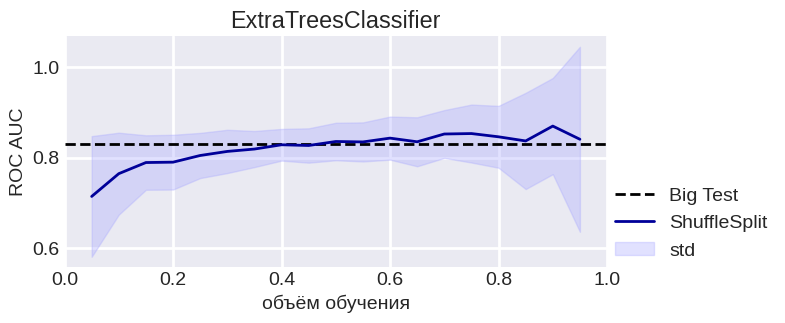

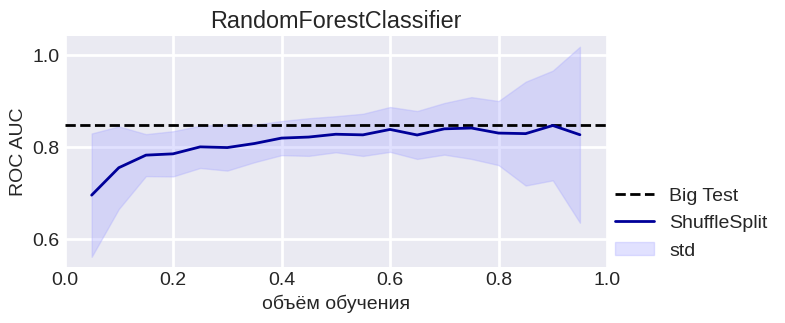

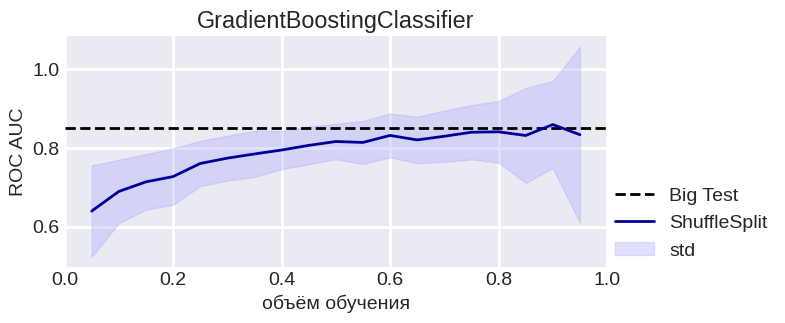

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          GaussianNB(),
          SVC(probability=True),
          KNeighborsClassifier(),
          ExtraTreesClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier()]

n_sizes = 19
sizes = np.linspace(0.05, 0.95, n_sizes)

n_models = len(models)
LENS = np.zeros((n_models, n_sizes))
MEANS = np.zeros((n_models, n_sizes))
STDS = np.zeros((n_models, n_sizes))
RESS = np.zeros(n_models)

for i_model, model in enumerate(models):
  print (f'Model {model.__class__.__name__}')
  model.fit(X, y)
  a = model.predict_proba(X2)[:,1]
  qtest = roc_auc_score(y2, a)

  lens, means, stds = runexp(X, y, model, sizes, n_splits=100)
  print (f'qtest {qtest:.3}, means {np.mean(means):.3}, stds {np.mean(stds):.3}, lens {np.mean(lens):.3}')
  LENS[i_model] = lens
  MEANS[i_model] = means
  STDS[i_model] = stds
  RESS[i_model] = qtest

  draw_pic(model.__class__.__name__, qtest, sizes, means, stds)

Text(0, 0.5, 'ROC AUC')

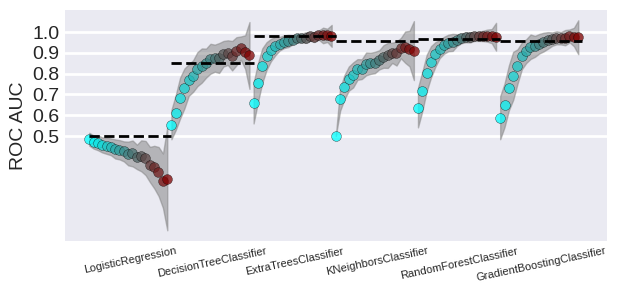

In [ ]:
model_names = [model.__class__.__name__ for model in models]
#plt.scatter(np.arange(n_models), RESS, 30, 'k', edgecolor='w', zorder=3, lw=0.3)
for j in range(n_models):
  plt.fill_between(np.linspace(0.0, 0.95, 19) - 0.5 + j, MEANS[j,:] - STDS[j,:], MEANS[j,:] + STDS[j,:], edgecolor='k', lw=1, color='grey', alpha=0.5, zorder=1) # ,alpha=0.35
  plt.plot([j-0.5, j+0.5], [RESS[j], RESS[j]], 'k--', lw=2, zorder=3) #, alpha=0.7)
for i in range(19):
  plt.scatter(np.arange(n_models) -0.5 + i/19,MEANS[:,i], 50, c=(0.5 * i/18, 1 - i/18, 1 - i/18), lw=0.3, edgecolor='k', zorder=2, alpha=0.75)
plt.xticks(np.arange(n_models), model_names, rotation=12, fontsize=8);
plt.grid(axis='y', lw=2)
plt.yticks(linspace(0.5, 1, 6));
plt.ylabel('ROC AUC')

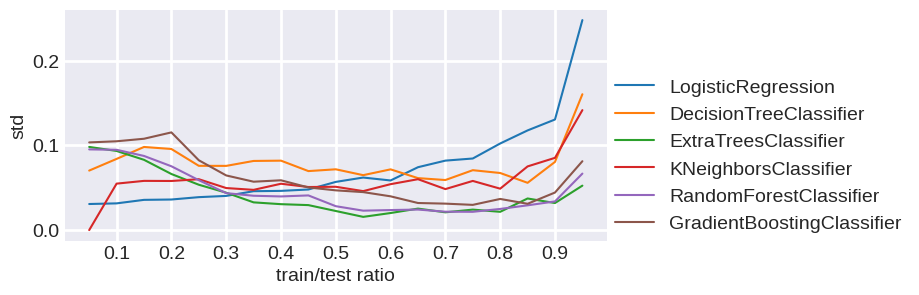

In [ ]:
#from matplotlib import cm
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#prism = cm.get_cmap('prism', n_models)
prism = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(n_models):
  plt.plot(np.linspace(0.05, 0.95, 19), STDS[i,:], label=model_names[i], c=prism[i]) #prism(i)[:3]) #=(i/n_models, 0.5*i/n_models, 1 - i/n_models))
plt.legend()
plt.legend(loc=(1,0))
plt.xlabel('train/test ratio')
plt.ylabel('std')
plt.grid(lw=2)
plt.xticks(np.linspace(0.1, 0.9, 9));

In [ ]:
MEANS

array([[0.75637855, 0.81514074, 0.82875969, 0.8366125 , 0.84461593,
        0.84822041, 0.8440625 , 0.84581111, 0.85033163, 0.85438462,
        0.84482042, 0.8534    , 0.85248366, 0.85502222, 0.8549359 ,
        0.8493    , 0.82892857, 0.8584    , 0.855     ],
       [0.633125  , 0.67166667, 0.6761794 , 0.672625  , 0.69158962,
        0.68857143, 0.69716383, 0.71216667, 0.70339286, 0.72781538,
        0.72456522, 0.725     , 0.72297386, 0.72633333, 0.73560897,
        0.73      , 0.73696429, 0.741     , 0.71666667],
       [0.71187943, 0.76472099, 0.79024363, 0.78903125, 0.80391181,
        0.81416327, 0.81788826, 0.82767778, 0.82947066, 0.8368    ,
        0.83650284, 0.843075  , 0.83531046, 0.85251111, 0.85166667,
        0.8454    , 0.84035714, 0.8648    , 0.8525    ],
       [0.5       , 0.73815062, 0.76136213, 0.77543125, 0.79473329,
        0.81380408, 0.81772727, 0.82292222, 0.82771684, 0.8295    ,
        0.82249527, 0.8317375 , 0.82364379, 0.83033333, 0.84141026,
        0.823

In [ ]:
STDS

array([[0.15296497, 0.07066314, 0.03672049, 0.03471887, 0.02693111,
        0.02886895, 0.03369351, 0.03397488, 0.03151632, 0.03424822,
        0.04021811, 0.04967333, 0.05072001, 0.05853109, 0.06806144,
        0.0683265 , 0.10571006, 0.12124949, 0.18656992],
       [0.09593166, 0.07355816, 0.06532497, 0.06997086, 0.05813782,
        0.0678233 , 0.06434581, 0.05399871, 0.05462622, 0.05415108,
        0.06133787, 0.06164414, 0.05994146, 0.07107039, 0.08339309,
        0.09746794, 0.10678825, 0.13423487, 0.20849993],
       [0.13453687, 0.08783548, 0.06065873, 0.06072007, 0.05156058,
        0.0476861 , 0.04143503, 0.0379633 , 0.04147506, 0.03855001,
        0.04325103, 0.04770005, 0.05185704, 0.05395531, 0.06741457,
        0.07213418, 0.10618831, 0.11236085, 0.18553788],
       [0.        , 0.09129973, 0.05572583, 0.05816928, 0.049089  ,
        0.04108254, 0.04040881, 0.03682547, 0.03669382, 0.04080889,
        0.04222256, 0.05127801, 0.05150313, 0.0567606 , 0.06659186,
        0.070

In [ ]:
LENS

array([[100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100.]])

In [ ]:
RESS

array([0.88763207, 0.72308   , 0.83152004, 0.84144102, 0.85044905,
       0.85079722])

# другой эксперимент

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
X, y = make_gaussian_quantiles(n_samples=m, n_features=3, n_classes=2, random_state=11)
X2, y2 = make_gaussian_quantiles(n_samples=q, n_features=3, n_classes=2, random_state=120)

Model LogisticRegression


19it [00:08,  2.26it/s]


qtest 0.499, means 0.407, stds 0.0722, lens 1e+02
Model DecisionTreeClassifier


19it [00:05,  3.59it/s]


qtest 0.849, means 0.819, stds 0.0788, lens 1e+02
Model ExtraTreesClassifier


19it [03:55, 12.38s/it]


qtest 0.979, means 0.926, stds 0.0423, lens 1e+02
Model KNeighborsClassifier


19it [00:05,  3.23it/s]


qtest 0.954, means 0.83, stds 0.0581, lens 1e+02
Model RandomForestClassifier


19it [05:04, 16.03s/it]


qtest 0.964, means 0.916, stds 0.046, lens 1e+02
Model GradientBoostingClassifier


19it [02:17,  7.23s/it]


qtest 0.955, means 0.89, stds 0.0613, lens 1e+02


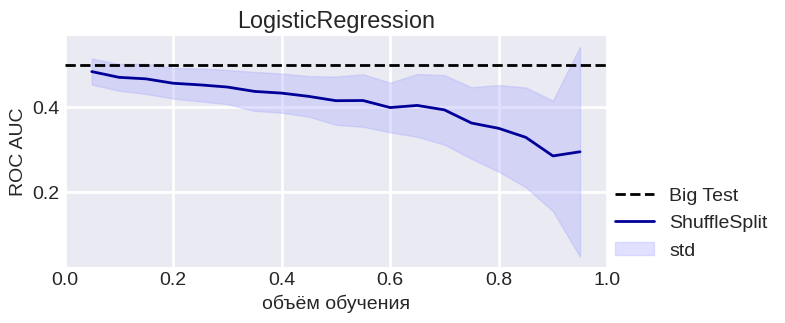

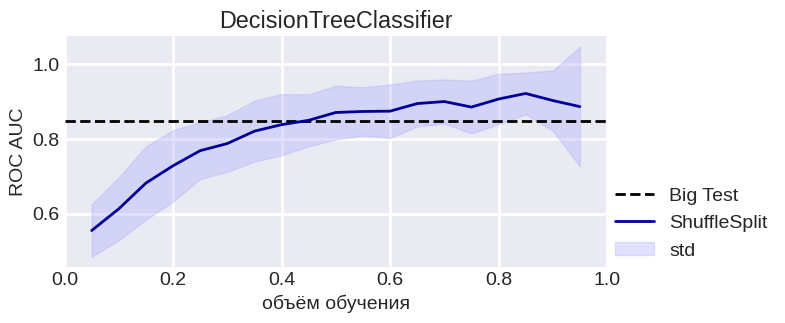

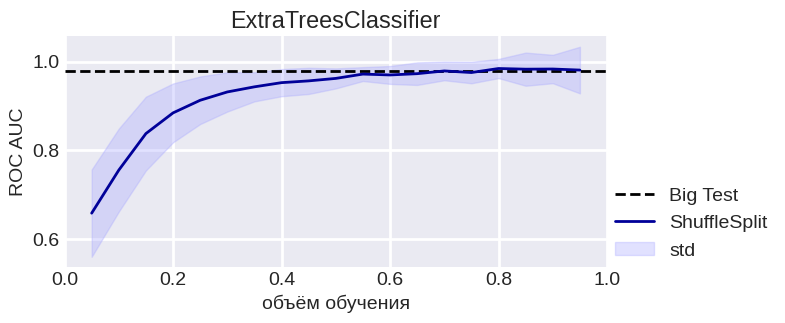

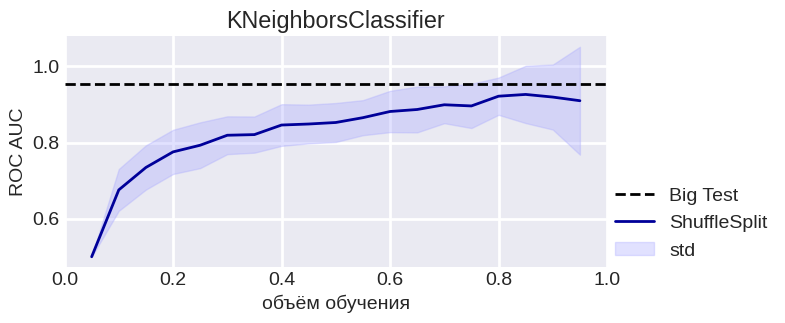

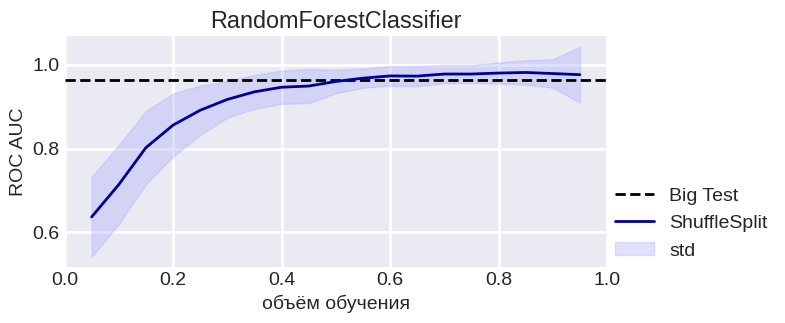

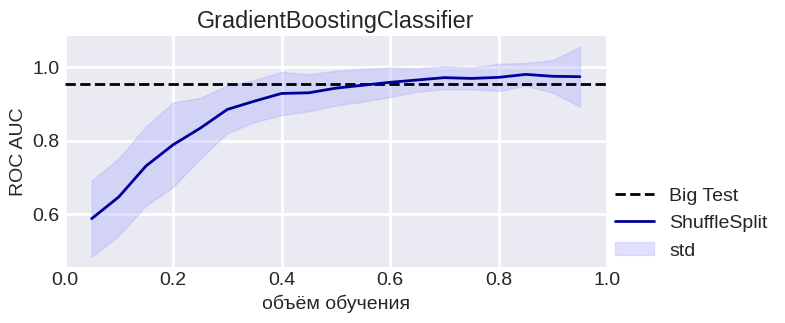

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          ExtraTreesClassifier(),
          KNeighborsClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier()]

n_models = len(models)
LENS = np.zeros((n_models, 19))
MEANS = np.zeros((n_models, 19))
STDS = np.zeros((n_models, 19))
RESS = np.zeros(n_models)

for i_model, model in enumerate(models):
  print (f'Model {model.__class__.__name__}')
  model.fit(X, y)
  a = model.predict_proba(X2)[:,1]
  qtest = roc_auc_score(y2, a)

  lens, means, stds = runexp(X, y, model, n_splits=100)
  print (f'qtest {qtest:.3}, means {np.mean(means):.3}, stds {np.mean(stds):.3}, lens {np.mean(lens):.3}')
  LENS[i_model] = lens
  MEANS[i_model] = means
  STDS[i_model] = stds
  RESS[i_model] = qtest

  draw_pic(model.__class__.__name__, qtest, sizes, means, stds)

Text(0, 0.5, 'ROC AUC')

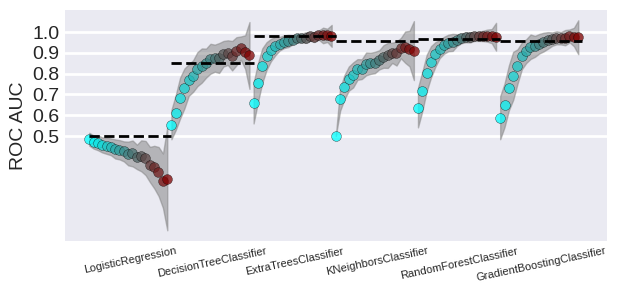

In [ ]:
model_names = [model.__class__.__name__ for model in models]
#plt.scatter(np.arange(n_models), RESS, 30, 'k', edgecolor='w', zorder=3, lw=0.3)
for j in range(n_models):
  plt.fill_between(np.linspace(0.0, 0.95, 19) - 0.5 + j, MEANS[j,:] - STDS[j,:], MEANS[j,:] + STDS[j,:], edgecolor='k', lw=1, color='grey', alpha=0.5, zorder=1) # ,alpha=0.35
  plt.plot([j-0.5, j+0.5], [RESS[j], RESS[j]], 'k--', lw=2, zorder=3) #, alpha=0.7)
for i in range(19):
  plt.scatter(np.arange(n_models) -0.5 + i/19,MEANS[:,i], 50, c=(0.5 * i/18, 1 - i/18, 1 - i/18), lw=0.3, edgecolor='k', zorder=2, alpha=0.75)
plt.xticks(np.arange(n_models), model_names, rotation=12, fontsize=8);
plt.grid(axis='y', lw=2)
plt.yticks(linspace(0.5, 1, 6));
plt.ylabel('ROC AUC')

Забавно, но в данном датасете это возможно:

из-за того что в середине один класс, а окружает его другой.
при делении на обучение и контроль возникает перекос (с одной стороны оболочка, с другой - ядро). И когда отделяем ядро от оболочки - отделяем заведомо неправильно, т.к. с другой стороны ядра - оболочка не попавшая в обучение.

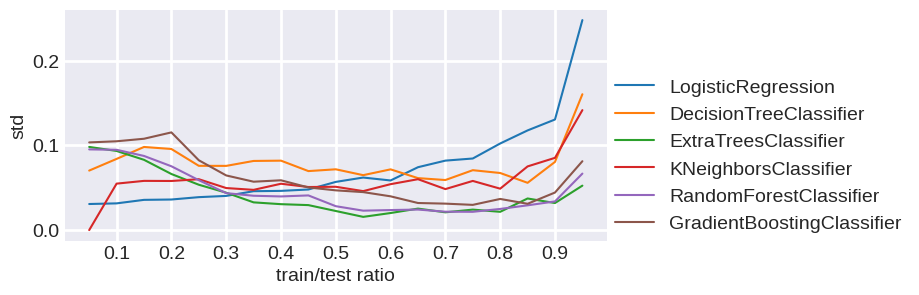

In [ ]:
#from matplotlib import cm
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#prism = cm.get_cmap('prism', n_models)
prism = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(n_models):
  plt.plot(np.linspace(0.05, 0.95, 19), STDS[i,:], label=model_names[i], c=prism[i]) #prism(i)[:3]) #=(i/n_models, 0.5*i/n_models, 1 - i/n_models))
plt.legend()
plt.legend(loc=(1,0))
plt.xlabel('train/test ratio')
plt.ylabel('std')
plt.grid(lw=2)
plt.xticks(np.linspace(0.1, 0.9, 9));

In [ ]:
MEANS

array([[0.48451684, 0.47094815, 0.46732004, 0.45695625, 0.45305121,
        0.44798367, 0.43766098, 0.43363333, 0.42589286, 0.41573846,
        0.41612476, 0.3995    , 0.40457516, 0.394     , 0.36288462,
        0.3504    , 0.32910714, 0.2852    , 0.295     ],
       [0.55435505, 0.61266667, 0.68170819, 0.728125  , 0.76852418,
        0.78771429, 0.82087595, 0.83833333, 0.85      , 0.87097692,
        0.87369565, 0.8745    , 0.89490196, 0.90033333, 0.88551282,
        0.907     , 0.92196429, 0.903     , 0.88666667],
       [0.65836879, 0.75537778, 0.8377464 , 0.88435   , 0.91278805,
        0.93153469, 0.94306345, 0.9525    , 0.95646684, 0.96206154,
        0.97179584, 0.9698375 , 0.97271242, 0.97886667, 0.97528846,
        0.98435   , 0.98285714, 0.9832    , 0.98083333],
       [0.5       , 0.67570123, 0.7346567 , 0.77554687, 0.79306899,
        0.8192898 , 0.82099432, 0.84613333, 0.84882653, 0.85280769,
        0.86545369, 0.8817    , 0.88694444, 0.89937778, 0.8963141 ,
        0.921

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
X, y = make_gaussian_quantiles(n_samples=m, n_features=2, n_classes=2, random_state=11)
# X2, y2 = make_gaussian_quantiles(n_samples=q, n_features=3, n_classes=2, random_state=120)

In [ ]:
#cv = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=100, train_size=0.8, random_state=1), scoring='roc_auc')
cv = ShuffleSplit(n_splits=10, train_size=0.7, random_state=1)

model = LogisticRegression()

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  model.fit(X[train_index,:], y[train_index])
  a = model.predict_proba(X[test_index,:])[:,1]
  qtest = roc_auc_score(y[test_index], a)
  print(qtest)

0.4602272727272727
0.27601809954751133
0.3472222222222222
0.5694444444444444
0.3619909502262444
0.4751131221719457
0.6133333333333333
0.34821428571428575
0.33035714285714285
0.3257918552036199


In [ ]:
#cv = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=100, train_size=0.8, random_state=1), scoring='roc_auc')
cv = StratifiedShuffleSplit(n_splits=10, train_size=0.7, random_state=1)

model = LogisticRegression()

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  model.fit(X[train_index,:], y[train_index])
  a = model.predict_proba(X[test_index,:])[:,1]
  qtest = roc_auc_score(y[test_index], a)
  print(qtest)

0.23555555555555557
0.4177777777777778
0.3466666666666667
0.46222222222222226
0.3244444444444444
0.5022222222222222
0.2577777777777777
0.5111111111111111
0.4088888888888889
0.4444444444444444


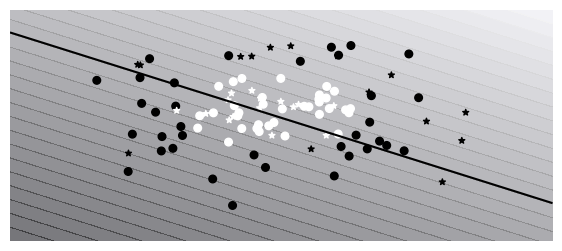

In [ ]:
plot_2d_separator(model, X, fill=True)
plt.scatter(X[train_index,0], X[train_index,1], 30, y[train_index])
plt.scatter(X[test_index,0], X[test_index,1], 20, y[test_index], marker='*')

In [ ]:
def plot_2d_separator(classifier, X, fill=False, twocolor=False, line=True, ax=None, eps=None, nlines=0):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1001)
    yy = np.linspace(y_min, y_max, 1001)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        try:
            decision_values = classifier.predict_proba(X_grid)[:, 1]
        except:
            decision_values = classifier.predict(X_grid)
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        c = decision_values.reshape(X1.shape)
        if twocolor:
            print (fill_levels)
            ax.contourf(X1, X2, c,
                        levels=fill_levels, colors=['#FF9999', '#0000FF'], alpha=0.2)
        else:
            ax.contourf(X1, X2, c,
                        levels=np.linspace(c.min(), c.max(), 30), cmap=plt.cm.binary, alpha=0.5)

        if nlines > 0:
            ax.contour(X1, X2, c,
                 levels=np.linspace(c.min(), c.max(), nlines), alpha=0.5, colors="white")
#         ax.contour(X1, X2, c,
#                     levels=np.linspace(c.min(), c.max(), 30), alpha=0.5, colors="white")

    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

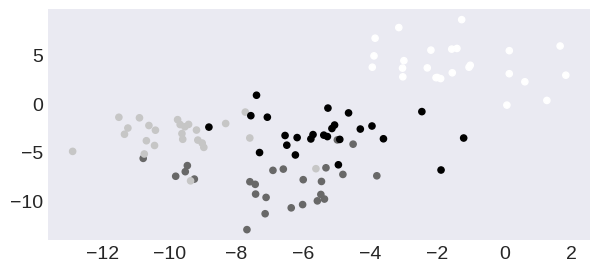

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=2, random_state=1)
plt.scatter(X[:,0], X[:,1], 20, y)

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

<Figure size 500x500 with 0 Axes>

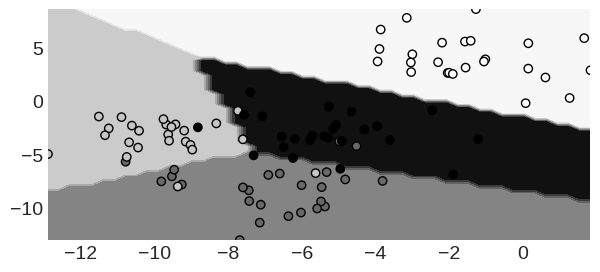

In [ ]:

feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max()),
    np.linspace(X[:, 1].min(), X[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
model = LogisticRegression().fit(X, y)
y_pred = np.reshape(model.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)

plt.figure(figsize=(5, 5))
display.plot()
display.ax_.scatter(
    X[:, 0], X[:, 1], c=y, edgecolor="black"
)
plt.show()

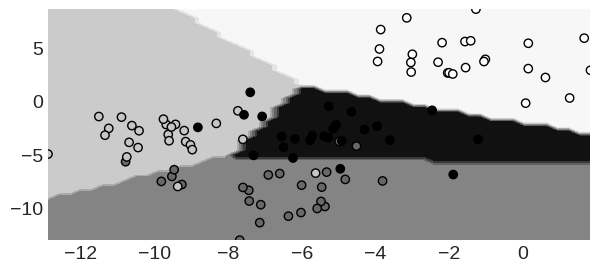

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(LogisticRegression())
model.fit(X, y)

feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max()),
    np.linspace(X[:, 1].min(), X[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

y_pred = np.reshape(model.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
display.ax_.scatter(
    X[:, 0], X[:, 1], c=y, edgecolor="black"
)
plt.show()

<Figure size 500x500 with 0 Axes>

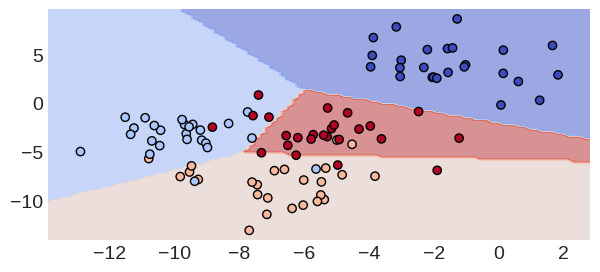

In [ ]:
model = OneVsRestClassifier(LogisticRegression())
model.fit(X, y)

# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(5, 5))
disp = DecisionBoundaryDisplay.from_estimator(model,
                                              X,
                                              response_method="predict",
                                              #xlabel=data.feature_names[0], ylabel=data.feature_names[1],
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X[:, 0], X[:, 1],
                 c=y, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.show()

<Figure size 500x500 with 0 Axes>

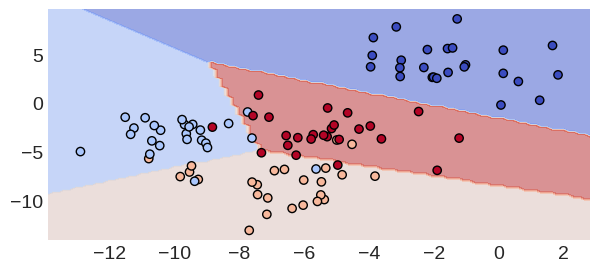

In [ ]:
model = LogisticRegression() # multi_class='multinomial'
model.fit(X, y)

# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(5, 5))
disp = DecisionBoundaryDisplay.from_estimator(model,
                                              X,
                                              response_method="predict",
                                              #xlabel=data.feature_names[0], ylabel=data.feature_names[1],
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X[:, 0], X[:, 1],
                 c=y, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.show()

In [ ]:
model = LogisticRegression() # multi_class='multinomial'
model.fit(X, y)

LogisticRegression()

In [ ]:
model.predict_proba(X)[:3]

array([[1.01714902e-08, 8.00603740e-01, 1.90881433e-01, 8.51481608e-03],
       [1.58544770e-07, 9.06670897e-01, 7.34381082e-02, 1.98908366e-02],
       [6.79482662e-06, 2.96550511e-02, 7.16568414e-01, 2.53769740e-01]])

In [ ]:
model = LogisticRegression(multi_class='ovr') # multi_class='multinomial'
model.fit(X, y)
model.predict_proba(X)[:3]

array([[3.83906806e-07, 6.17578851e-01, 2.50895788e-01, 1.31524977e-01],
       [3.25703853e-06, 7.49892070e-01, 9.70102168e-02, 1.53094456e-01],
       [1.93366259e-05, 1.02954405e-02, 6.70948964e-01, 3.18736259e-01]])

In [ ]:
model.predict_proba(X)[:3].sum(axis=1)

array([1., 1., 1.])